In [1]:
import os
import sys
from collections import OrderedDict

In [2]:
sys.path.append("../..")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import spatialpy
spatialpy.__file__

'../../spatialpy/__init__.py'

In [5]:
import matplotlib.pyplot as plt
import numpy

# Global Constants
MAX_X_DIM = 5.0
MIN_X_DIM = -5.0
TOL = 1e-9

In [6]:
class Edge1(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - MAX_X_DIM) < 0.05
class Edge2(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - MIN_X_DIM) < 0.05


In [16]:
class cylinderDemo3D(spatialpy.Model):
    def __init__(self, model_name="cylinder_demo3d"):
        spatialpy.Model.__init__(self, model_name)

        # System constants
        D_const = 0.1

        # Define Species
        A = spatialpy.Species(name="A", diffusion_constant=D_const)
        B = spatialpy.Species(name="B", diffusion_constant=D_const)
        self.add_species([A, B])

        # Define Geometry
        self.mesh = spatialpy.Mesh.read_xml_mesh('cylinder.xml')

        # Define Subdomains
        self.add_subdomain(Edge1(), 2)
        self.add_subdomain(Edge2(), 3)
        
        # Restrict the movement of Chemical Species
        self.restrict(A,[1,2])
        self.restrict(B,[1,3])

        vol = self.mesh.get_vol()
        print("vol",vol)
        sd = self.mesh.sd
        left = numpy.sum(vol[sd == 2])
        right = numpy.sum(vol[sd == 3])
        print("left "+str(left)+" right "+str(right))
        
        k_react = spatialpy.Parameter(name="k_react", expression=1.0)
        k_creat1 = spatialpy.Parameter(name="k_creat1", 
                                     expression=100/left)
        k_creat2 = spatialpy.Parameter(name="k_creat2", 
                                     expression=100/right)
        self.add_parameter([k_react, k_creat1,k_creat2])


        # Define Reactions
        R1 = spatialpy.Reaction(reactants=None, products={A:1}, 
                                rate=k_creat1, restrict_to=2)
        R2 = spatialpy.Reaction(reactants=None, products={B:1}, 
                              rate=k_creat2, restrict_to=3)
        R3 = spatialpy.Reaction(reactants={A:1, B:1}, products=None, 
                              rate=k_react)
        self.add_reaction([R1, R2, R3])

        # Define simulation timespan
        #self.set_timesteps(1, 200)
        self.timespan(range(500))

In [18]:
model = cylinderDemo3D()

vol [0.01513526 0.07034112 0.02382667 ... 0.01674217 0.02120607 0.01969156]
left 0.5092013833059308 right 0.505804729089437


In [19]:
model.listOfReactions

OrderedDict([('rxn845eaef9_a206_4ce9_9ce6_18db313be368',
              <spatialpy.Model.Reaction at 0x7f5dda0efaf0>),
             ('rxndd43e47d_a800_4ca8_bc8b_d72a39ac5dc8',
              <spatialpy.Model.Reaction at 0x7f5dda0ef790>),
             ('rxnf8c388d7_3ba5_47d8_82a4_e32385a5081f',
              <spatialpy.Model.Reaction at 0x7f5dda0ef310>)])

In [20]:
from spatialpy.nsmsolver import NSMSolver

In [29]:
#result = model.run(report_level=2)
sol = NSMSolver(model, report_level=2)
sol.h = 0.8
print("h="+str(sol.h))
%time sol.compile()

h=0.8
Compiling Solver.  Build dir: /tmp/spatialpy_build_7v1vl9q1
Creating propensity file /tmp/spatialpy_build_7v1vl9q1/cylinder_demo3d_generated_model.c
cmd: cd /tmp/spatialpy_build_7v1vl9q1 ; make -f /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/build/Makefile.nsm ROOT=/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine MODEL=/tmp/spatialpy_build_7v1vl9q1/cylinder_demo3d_generated_model.c BUILD=/tmp/spatialpy_build_7v1vl9q1

gcc -c -o linked_list.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/src/linked_list.c -I/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/include/ -O3 -Wall 
gcc -c -o particle.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/src/particle.c -I/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/include/ -O3 -Wall 
gcc -c -o simulate.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sd

In [30]:
%time result = sol.run()

cmd: cd /tmp/spatialpy_result_e7lvvnrm;/tmp/spatialpy_build_7v1vl9q1/ssa_sdpd

Elapsed seconds: 3.03

CPU times: user 2.28 ms, sys: 4.46 ms, total: 6.74 ms
Wall time: 3.03 s


read_step(0) opening '/tmp/spatialpy_result_e7lvvnrm/output0.vtk'
read_step(1) opening '/tmp/spatialpy_result_e7lvvnrm/output1.vtk'
read_step(2) opening '/tmp/spatialpy_result_e7lvvnrm/output2.vtk'
read_step(3) opening '/tmp/spatialpy_result_e7lvvnrm/output3.vtk'
read_step(4) opening '/tmp/spatialpy_result_e7lvvnrm/output4.vtk'
read_step(5) opening '/tmp/spatialpy_result_e7lvvnrm/output5.vtk'
read_step(6) opening '/tmp/spatialpy_result_e7lvvnrm/output6.vtk'
read_step(7) opening '/tmp/spatialpy_result_e7lvvnrm/output7.vtk'
read_step(8) opening '/tmp/spatialpy_result_e7lvvnrm/output8.vtk'
read_step(9) opening '/tmp/spatialpy_result_e7lvvnrm/output9.vtk'
read_step(10) opening '/tmp/spatialpy_result_e7lvvnrm/output10.vtk'
read_step(11) opening '/tmp/spatialpy_result_e7lvvnrm/output11.vtk'
read_step(12) opening '/tmp/spatialpy_result_e7lvvnrm/output12.vtk'
read_step(13) opening '/tmp/spatialpy_result_e7lvvnrm/output13.vtk'
read_step(14) opening '/tmp/spatialpy_result_e7lvvnrm/output14.vtk'


read_step(145) opening '/tmp/spatialpy_result_e7lvvnrm/output145.vtk'
read_step(146) opening '/tmp/spatialpy_result_e7lvvnrm/output146.vtk'
read_step(147) opening '/tmp/spatialpy_result_e7lvvnrm/output147.vtk'
read_step(148) opening '/tmp/spatialpy_result_e7lvvnrm/output148.vtk'
read_step(149) opening '/tmp/spatialpy_result_e7lvvnrm/output149.vtk'
read_step(150) opening '/tmp/spatialpy_result_e7lvvnrm/output150.vtk'
read_step(151) opening '/tmp/spatialpy_result_e7lvvnrm/output151.vtk'
read_step(152) opening '/tmp/spatialpy_result_e7lvvnrm/output152.vtk'
read_step(153) opening '/tmp/spatialpy_result_e7lvvnrm/output153.vtk'
read_step(154) opening '/tmp/spatialpy_result_e7lvvnrm/output154.vtk'
read_step(155) opening '/tmp/spatialpy_result_e7lvvnrm/output155.vtk'
read_step(156) opening '/tmp/spatialpy_result_e7lvvnrm/output156.vtk'
read_step(157) opening '/tmp/spatialpy_result_e7lvvnrm/output157.vtk'
read_step(158) opening '/tmp/spatialpy_result_e7lvvnrm/output158.vtk'
read_step(159) openi

read_step(295) opening '/tmp/spatialpy_result_e7lvvnrm/output295.vtk'
read_step(296) opening '/tmp/spatialpy_result_e7lvvnrm/output296.vtk'
read_step(297) opening '/tmp/spatialpy_result_e7lvvnrm/output297.vtk'
read_step(298) opening '/tmp/spatialpy_result_e7lvvnrm/output298.vtk'
read_step(299) opening '/tmp/spatialpy_result_e7lvvnrm/output299.vtk'
read_step(300) opening '/tmp/spatialpy_result_e7lvvnrm/output300.vtk'
read_step(301) opening '/tmp/spatialpy_result_e7lvvnrm/output301.vtk'
read_step(302) opening '/tmp/spatialpy_result_e7lvvnrm/output302.vtk'
read_step(303) opening '/tmp/spatialpy_result_e7lvvnrm/output303.vtk'
read_step(304) opening '/tmp/spatialpy_result_e7lvvnrm/output304.vtk'
read_step(305) opening '/tmp/spatialpy_result_e7lvvnrm/output305.vtk'
read_step(306) opening '/tmp/spatialpy_result_e7lvvnrm/output306.vtk'
read_step(307) opening '/tmp/spatialpy_result_e7lvvnrm/output307.vtk'
read_step(308) opening '/tmp/spatialpy_result_e7lvvnrm/output308.vtk'
read_step(309) openi

read_step(446) opening '/tmp/spatialpy_result_e7lvvnrm/output446.vtk'
read_step(447) opening '/tmp/spatialpy_result_e7lvvnrm/output447.vtk'
read_step(448) opening '/tmp/spatialpy_result_e7lvvnrm/output448.vtk'
read_step(449) opening '/tmp/spatialpy_result_e7lvvnrm/output449.vtk'
read_step(450) opening '/tmp/spatialpy_result_e7lvvnrm/output450.vtk'
read_step(451) opening '/tmp/spatialpy_result_e7lvvnrm/output451.vtk'
read_step(452) opening '/tmp/spatialpy_result_e7lvvnrm/output452.vtk'
read_step(453) opening '/tmp/spatialpy_result_e7lvvnrm/output453.vtk'
read_step(454) opening '/tmp/spatialpy_result_e7lvvnrm/output454.vtk'
read_step(455) opening '/tmp/spatialpy_result_e7lvvnrm/output455.vtk'
read_step(456) opening '/tmp/spatialpy_result_e7lvvnrm/output456.vtk'
read_step(457) opening '/tmp/spatialpy_result_e7lvvnrm/output457.vtk'
read_step(458) opening '/tmp/spatialpy_result_e7lvvnrm/output458.vtk'
read_step(459) opening '/tmp/spatialpy_result_e7lvvnrm/output459.vtk'
read_step(460) openi

read_step(91) opening '/tmp/spatialpy_result_e7lvvnrm/output91.vtk'
read_step(92) opening '/tmp/spatialpy_result_e7lvvnrm/output92.vtk'
read_step(93) opening '/tmp/spatialpy_result_e7lvvnrm/output93.vtk'
read_step(94) opening '/tmp/spatialpy_result_e7lvvnrm/output94.vtk'
read_step(95) opening '/tmp/spatialpy_result_e7lvvnrm/output95.vtk'
read_step(96) opening '/tmp/spatialpy_result_e7lvvnrm/output96.vtk'
read_step(97) opening '/tmp/spatialpy_result_e7lvvnrm/output97.vtk'
read_step(98) opening '/tmp/spatialpy_result_e7lvvnrm/output98.vtk'
read_step(99) opening '/tmp/spatialpy_result_e7lvvnrm/output99.vtk'
read_step(100) opening '/tmp/spatialpy_result_e7lvvnrm/output100.vtk'
read_step(101) opening '/tmp/spatialpy_result_e7lvvnrm/output101.vtk'
read_step(102) opening '/tmp/spatialpy_result_e7lvvnrm/output102.vtk'
read_step(103) opening '/tmp/spatialpy_result_e7lvvnrm/output103.vtk'
read_step(104) opening '/tmp/spatialpy_result_e7lvvnrm/output104.vtk'
read_step(105) opening '/tmp/spatialpy

read_step(238) opening '/tmp/spatialpy_result_e7lvvnrm/output238.vtk'
read_step(239) opening '/tmp/spatialpy_result_e7lvvnrm/output239.vtk'
read_step(240) opening '/tmp/spatialpy_result_e7lvvnrm/output240.vtk'
read_step(241) opening '/tmp/spatialpy_result_e7lvvnrm/output241.vtk'
read_step(242) opening '/tmp/spatialpy_result_e7lvvnrm/output242.vtk'
read_step(243) opening '/tmp/spatialpy_result_e7lvvnrm/output243.vtk'
read_step(244) opening '/tmp/spatialpy_result_e7lvvnrm/output244.vtk'
read_step(245) opening '/tmp/spatialpy_result_e7lvvnrm/output245.vtk'
read_step(246) opening '/tmp/spatialpy_result_e7lvvnrm/output246.vtk'
read_step(247) opening '/tmp/spatialpy_result_e7lvvnrm/output247.vtk'
read_step(248) opening '/tmp/spatialpy_result_e7lvvnrm/output248.vtk'
read_step(249) opening '/tmp/spatialpy_result_e7lvvnrm/output249.vtk'
read_step(250) opening '/tmp/spatialpy_result_e7lvvnrm/output250.vtk'
read_step(251) opening '/tmp/spatialpy_result_e7lvvnrm/output251.vtk'
read_step(252) openi

read_step(385) opening '/tmp/spatialpy_result_e7lvvnrm/output385.vtk'
read_step(386) opening '/tmp/spatialpy_result_e7lvvnrm/output386.vtk'
read_step(387) opening '/tmp/spatialpy_result_e7lvvnrm/output387.vtk'
read_step(388) opening '/tmp/spatialpy_result_e7lvvnrm/output388.vtk'
read_step(389) opening '/tmp/spatialpy_result_e7lvvnrm/output389.vtk'
read_step(390) opening '/tmp/spatialpy_result_e7lvvnrm/output390.vtk'
read_step(391) opening '/tmp/spatialpy_result_e7lvvnrm/output391.vtk'
read_step(392) opening '/tmp/spatialpy_result_e7lvvnrm/output392.vtk'
read_step(393) opening '/tmp/spatialpy_result_e7lvvnrm/output393.vtk'
read_step(394) opening '/tmp/spatialpy_result_e7lvvnrm/output394.vtk'
read_step(395) opening '/tmp/spatialpy_result_e7lvvnrm/output395.vtk'
read_step(396) opening '/tmp/spatialpy_result_e7lvvnrm/output396.vtk'
read_step(397) opening '/tmp/spatialpy_result_e7lvvnrm/output397.vtk'
read_step(398) opening '/tmp/spatialpy_result_e7lvvnrm/output398.vtk'
read_step(399) openi

read_step(32) opening '/tmp/spatialpy_result_e7lvvnrm/output32.vtk'
read_step(33) opening '/tmp/spatialpy_result_e7lvvnrm/output33.vtk'
read_step(34) opening '/tmp/spatialpy_result_e7lvvnrm/output34.vtk'
read_step(35) opening '/tmp/spatialpy_result_e7lvvnrm/output35.vtk'
read_step(36) opening '/tmp/spatialpy_result_e7lvvnrm/output36.vtk'
read_step(37) opening '/tmp/spatialpy_result_e7lvvnrm/output37.vtk'
read_step(38) opening '/tmp/spatialpy_result_e7lvvnrm/output38.vtk'
read_step(39) opening '/tmp/spatialpy_result_e7lvvnrm/output39.vtk'
read_step(40) opening '/tmp/spatialpy_result_e7lvvnrm/output40.vtk'
read_step(41) opening '/tmp/spatialpy_result_e7lvvnrm/output41.vtk'
read_step(42) opening '/tmp/spatialpy_result_e7lvvnrm/output42.vtk'
read_step(43) opening '/tmp/spatialpy_result_e7lvvnrm/output43.vtk'
read_step(44) opening '/tmp/spatialpy_result_e7lvvnrm/output44.vtk'
read_step(45) opening '/tmp/spatialpy_result_e7lvvnrm/output45.vtk'
read_step(46) opening '/tmp/spatialpy_result_e7l

read_step(176) opening '/tmp/spatialpy_result_e7lvvnrm/output176.vtk'
read_step(177) opening '/tmp/spatialpy_result_e7lvvnrm/output177.vtk'
read_step(178) opening '/tmp/spatialpy_result_e7lvvnrm/output178.vtk'
read_step(179) opening '/tmp/spatialpy_result_e7lvvnrm/output179.vtk'
read_step(180) opening '/tmp/spatialpy_result_e7lvvnrm/output180.vtk'
read_step(181) opening '/tmp/spatialpy_result_e7lvvnrm/output181.vtk'
read_step(182) opening '/tmp/spatialpy_result_e7lvvnrm/output182.vtk'
read_step(183) opening '/tmp/spatialpy_result_e7lvvnrm/output183.vtk'
read_step(184) opening '/tmp/spatialpy_result_e7lvvnrm/output184.vtk'
read_step(185) opening '/tmp/spatialpy_result_e7lvvnrm/output185.vtk'
read_step(186) opening '/tmp/spatialpy_result_e7lvvnrm/output186.vtk'
read_step(187) opening '/tmp/spatialpy_result_e7lvvnrm/output187.vtk'
read_step(188) opening '/tmp/spatialpy_result_e7lvvnrm/output188.vtk'
read_step(189) opening '/tmp/spatialpy_result_e7lvvnrm/output189.vtk'
read_step(190) openi

read_step(323) opening '/tmp/spatialpy_result_e7lvvnrm/output323.vtk'
read_step(324) opening '/tmp/spatialpy_result_e7lvvnrm/output324.vtk'
read_step(325) opening '/tmp/spatialpy_result_e7lvvnrm/output325.vtk'
read_step(326) opening '/tmp/spatialpy_result_e7lvvnrm/output326.vtk'
read_step(327) opening '/tmp/spatialpy_result_e7lvvnrm/output327.vtk'
read_step(328) opening '/tmp/spatialpy_result_e7lvvnrm/output328.vtk'
read_step(329) opening '/tmp/spatialpy_result_e7lvvnrm/output329.vtk'
read_step(330) opening '/tmp/spatialpy_result_e7lvvnrm/output330.vtk'
read_step(331) opening '/tmp/spatialpy_result_e7lvvnrm/output331.vtk'
read_step(332) opening '/tmp/spatialpy_result_e7lvvnrm/output332.vtk'
read_step(333) opening '/tmp/spatialpy_result_e7lvvnrm/output333.vtk'
read_step(334) opening '/tmp/spatialpy_result_e7lvvnrm/output334.vtk'
read_step(335) opening '/tmp/spatialpy_result_e7lvvnrm/output335.vtk'
read_step(336) opening '/tmp/spatialpy_result_e7lvvnrm/output336.vtk'
read_step(337) openi

read_step(464) opening '/tmp/spatialpy_result_e7lvvnrm/output464.vtk'
read_step(465) opening '/tmp/spatialpy_result_e7lvvnrm/output465.vtk'
read_step(466) opening '/tmp/spatialpy_result_e7lvvnrm/output466.vtk'
read_step(467) opening '/tmp/spatialpy_result_e7lvvnrm/output467.vtk'
read_step(468) opening '/tmp/spatialpy_result_e7lvvnrm/output468.vtk'
read_step(469) opening '/tmp/spatialpy_result_e7lvvnrm/output469.vtk'
read_step(470) opening '/tmp/spatialpy_result_e7lvvnrm/output470.vtk'
read_step(471) opening '/tmp/spatialpy_result_e7lvvnrm/output471.vtk'
read_step(472) opening '/tmp/spatialpy_result_e7lvvnrm/output472.vtk'
read_step(473) opening '/tmp/spatialpy_result_e7lvvnrm/output473.vtk'
read_step(474) opening '/tmp/spatialpy_result_e7lvvnrm/output474.vtk'
read_step(475) opening '/tmp/spatialpy_result_e7lvvnrm/output475.vtk'
read_step(476) opening '/tmp/spatialpy_result_e7lvvnrm/output476.vtk'
read_step(477) opening '/tmp/spatialpy_result_e7lvvnrm/output477.vtk'
read_step(478) openi

read_step(107) opening '/tmp/spatialpy_result_e7lvvnrm/output107.vtk'
read_step(108) opening '/tmp/spatialpy_result_e7lvvnrm/output108.vtk'
read_step(109) opening '/tmp/spatialpy_result_e7lvvnrm/output109.vtk'
read_step(110) opening '/tmp/spatialpy_result_e7lvvnrm/output110.vtk'
read_step(111) opening '/tmp/spatialpy_result_e7lvvnrm/output111.vtk'
read_step(112) opening '/tmp/spatialpy_result_e7lvvnrm/output112.vtk'
read_step(113) opening '/tmp/spatialpy_result_e7lvvnrm/output113.vtk'
read_step(114) opening '/tmp/spatialpy_result_e7lvvnrm/output114.vtk'
read_step(115) opening '/tmp/spatialpy_result_e7lvvnrm/output115.vtk'
read_step(116) opening '/tmp/spatialpy_result_e7lvvnrm/output116.vtk'
read_step(117) opening '/tmp/spatialpy_result_e7lvvnrm/output117.vtk'
read_step(118) opening '/tmp/spatialpy_result_e7lvvnrm/output118.vtk'
read_step(119) opening '/tmp/spatialpy_result_e7lvvnrm/output119.vtk'
read_step(120) opening '/tmp/spatialpy_result_e7lvvnrm/output120.vtk'
read_step(121) openi

read_step(252) opening '/tmp/spatialpy_result_e7lvvnrm/output252.vtk'
read_step(253) opening '/tmp/spatialpy_result_e7lvvnrm/output253.vtk'
read_step(254) opening '/tmp/spatialpy_result_e7lvvnrm/output254.vtk'
read_step(255) opening '/tmp/spatialpy_result_e7lvvnrm/output255.vtk'
read_step(256) opening '/tmp/spatialpy_result_e7lvvnrm/output256.vtk'
read_step(257) opening '/tmp/spatialpy_result_e7lvvnrm/output257.vtk'
read_step(258) opening '/tmp/spatialpy_result_e7lvvnrm/output258.vtk'
read_step(259) opening '/tmp/spatialpy_result_e7lvvnrm/output259.vtk'
read_step(260) opening '/tmp/spatialpy_result_e7lvvnrm/output260.vtk'
read_step(261) opening '/tmp/spatialpy_result_e7lvvnrm/output261.vtk'
read_step(262) opening '/tmp/spatialpy_result_e7lvvnrm/output262.vtk'
read_step(263) opening '/tmp/spatialpy_result_e7lvvnrm/output263.vtk'
read_step(264) opening '/tmp/spatialpy_result_e7lvvnrm/output264.vtk'
read_step(265) opening '/tmp/spatialpy_result_e7lvvnrm/output265.vtk'
read_step(266) openi

read_step(402) opening '/tmp/spatialpy_result_e7lvvnrm/output402.vtk'
read_step(403) opening '/tmp/spatialpy_result_e7lvvnrm/output403.vtk'
read_step(404) opening '/tmp/spatialpy_result_e7lvvnrm/output404.vtk'
read_step(405) opening '/tmp/spatialpy_result_e7lvvnrm/output405.vtk'
read_step(406) opening '/tmp/spatialpy_result_e7lvvnrm/output406.vtk'
read_step(407) opening '/tmp/spatialpy_result_e7lvvnrm/output407.vtk'
read_step(408) opening '/tmp/spatialpy_result_e7lvvnrm/output408.vtk'
read_step(409) opening '/tmp/spatialpy_result_e7lvvnrm/output409.vtk'
read_step(410) opening '/tmp/spatialpy_result_e7lvvnrm/output410.vtk'
read_step(411) opening '/tmp/spatialpy_result_e7lvvnrm/output411.vtk'
read_step(412) opening '/tmp/spatialpy_result_e7lvvnrm/output412.vtk'
read_step(413) opening '/tmp/spatialpy_result_e7lvvnrm/output413.vtk'
read_step(414) opening '/tmp/spatialpy_result_e7lvvnrm/output414.vtk'
read_step(415) opening '/tmp/spatialpy_result_e7lvvnrm/output415.vtk'
read_step(416) openi

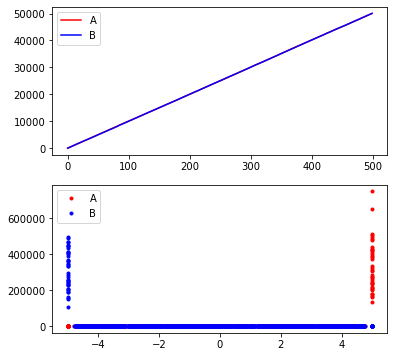

In [33]:
# Plot of the time-average spatial concentration.
x_vals = model.mesh.coordinates()[:, 0]
A_vals = numpy.sum(result.get_species("A", concentration=False), axis=0)
B_vals = numpy.sum(result.get_species("B", concentration=False), axis=0)

A_sum = numpy.sum(result.get_species("A"), axis=1)
B_sum = numpy.sum(result.get_species("B"), axis=1)
print(A_sum[-1])
print(B_sum[-1])
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(result.get_timespan(),A_sum,'-r',label="A")
plt.plot(result.get_timespan(),B_sum,'-b',label="B")
plt.legend(loc='best')
plt.subplot(2,1,2)

vol = model.mesh.vol
sd = model.mesh.sd
print(numpy.sum(vol[sd == 2]))
print(numpy.sum(vol[sd == 3]))


plt.plot(x_vals,A_vals,'.r',x_vals,B_vals,'.b')
plt.legend(['A', 'B'],loc='best')
